<a href="https://colab.research.google.com/github/yat0i811/DataDreamer/blob/main/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E3%81%AE%E7%94%9F%E5%AD%98%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#可視化系ライブラリのimport
# Pandas: データ操作と分析のためのライブラリ
import pandas as pd

# Numpy: 数値計算を効率的に行うためのライブラリ
import numpy as np

# Matplotlib: データの可視化のためのライブラリ
import matplotlib.pyplot as plt

#---------------------------------------------------------------------------
#機械学習モデルのimport
# RandomForestClassifier: ランダムフォレストモデルを使用するためのクラス
from sklearn.ensemble import RandomForestClassifier

#以下は今回使用しないが、一般的に二値分類で使われる機械学習モデルのimport文

# Logistic Regression: 線形モデルの一つで、確率をモデリングするために使用される。
# from sklearn.linear_model import LogisticRegression

# Support Vector Machines (SVM): 複雑な非線形の境界を持つ分類問題に適している。
# from sklearn.svm import SVC

# Decision Tree: 決定木はデータを学習する際に決定ルールを生成し、分類や回帰に使用される。
# from sklearn.tree import DecisionTreeClassifier

# K-Nearest Neighbors (KNN): 類似した特徴を持つデータポイントを基に分類を行う。
# from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes: 特徴間の独立性を仮定したベイズ定理を利用した分類器。
# from sklearn.naive_bayes import GaussianNB

# Gradient Boosting Classifier: 弱い学習器を順番に改善しながら強力な単一のモデルを構築する。
# from sklearn.ensemble import GradientBoostingClassifier

# AdaBoost Classifier: 各インスタンスの重みを調整しながら弱い学習器を組み合わせて性能を向上させる。
# from sklearn.ensemble import AdaBoostClassifier

# XGBoost: 実行速度とモデルのパフォーマンスに優れた勾配ブースティングライブラリ。
# from xgboost import XGBClassifier


#---------------------------------------------------------------------------
#ハイパーパラメータ調整用のimport文
# train_test_split: データを訓練セットとテストセットに分割するための関数
# GridSearchCV: ハイパーパラメータの最適化を行うためのクラス
# StratifiedKFold: 分層k分割交差検証を行うためのクラス
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold




#---------------------------------------------------------------------------
#評価用のimport文
# accuracy_score: 正答率を計算するための関数
# roc_auc_score: 受信者操作特性（ROC）曲線下の面積（AUC）を計算するための関数
# precision_score: 精度を計算するための関数
# recall_score: 再現率を計算するための関数
# f1_score: F1スコアを計算するための関数
# confusion_matrix: 混同行列を生成するための関数
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# roc_curve: ROC曲線を計算するための関数
# auc: ROC曲線下の面積を計算するための関数（roc_auc_scoreとは異なり、実際の曲線のポイントを計算する際に使用）
from sklearn.metrics import roc_curve, auc







#GoogleDriveからデータを読み取っている
train = pd.read_csv("train.tsv", sep="\t", index_col=0) # 学習用データ
test = pd.read_csv("test.tsv", sep="\t", index_col=0)   # 評価用データ
sample_submit = pd.read_csv("sample_submit.tsv", sep="\t", index_col=0, header=None) # 応募用サンプルファイル

In [28]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
873,0,3,male,47.0,0,0,9.0000,S
874,1,2,female,28.0,1,0,24.0000,C
879,1,1,female,56.0,0,1,83.1583,C




> データのカラムについて説明
---

データは8列、445行

---



*   Survived
  * 生死状態
  * 今回予測したい対象
  * 0が死亡　1が生存
*   Pclass
  * 席等級
  * 1が一番最上級の席、2が真ん中、3が最下級の席
*   sex
  * 性別
  *femaleが男性
  *maleが女性
*  age
  * 年齢
*  sibsp
  * 同乗した姉妹姉弟と配偶者の数
* parch
  * 同乗した両親こどもの数
* fare
  * 料金
* embarked
  * 乗船港
  * C=Cherourg,Q=Queenstown,S=Southampton



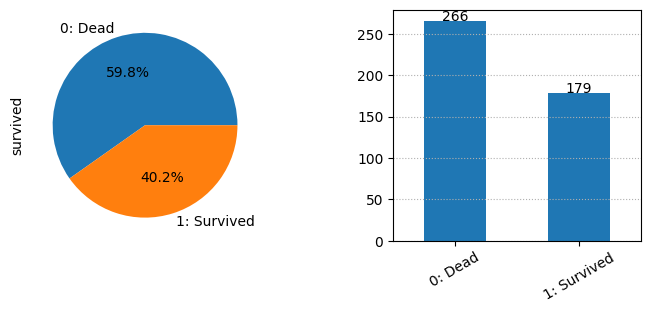

In [29]:
#生死の割合をグラフに出力して確認する
DICT_SURVIVED = {0: '0: Dead', 1: '1: Survived'}

def arrange_bar(ax, sr):
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, horizontalalignment="center")
    ax.grid(axis='y', linestyle='dotted')
    [ax.text(i, count, count, horizontalalignment='center') for i, count in enumerate(sr)]

sr_survived = train['survived'].value_counts().rename(DICT_SURVIVED)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
sr_survived.plot.pie(autopct="%1.1f%%", ax=axes[0])
sr_survived.plot.bar(ax=axes[1])

arrange_bar(axes[1], sr_survived)

plt.show()


In [30]:
#生死とほかの特徴量の関係を調べるために可視化関数を作成(現時点で中身を理解する必要はありません)
def arrange_stack_bar(ax):
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, horizontalalignment="center")
    ax.grid(axis='y', linestyle='dotted')

def output_bars(df, column, index={}):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    # Key-Valueラベルなしの場合
    if len(index) == 0:
        df_vc = df.groupby([column])["survived"].value_counts(
            sort=False).unstack().rename(columns=DICT_SURVIVED)
        df[column].value_counts().plot.pie(ax=axes[0, 0], autopct="%1.1f%%")
        df.groupby([column])["survived"].value_counts(
            sort=False, normalize=True).unstack().rename(columns=DICT_SURVIVED).plot.bar(ax=axes[1, 1], stacked=True)

    # Key-Valueラベルありの場合
    else:
        df_vc = df.groupby([column])["survived"].value_counts(
            sort=False).unstack().rename(index=index, columns=DICT_SURVIVED)
        df[column].value_counts().rename(index).plot.pie(ax=axes[0, 0], autopct="%1.1f%%")
        df.groupby([column])["survived"].value_counts(
            sort=False, normalize=True).unstack().rename(index=index, columns=DICT_SURVIVED).plot.bar(ax=axes[1, 1], stacked=True)

    df_vc.plot.bar(ax=axes[1, 0])

    for rect in axes[1, 0].patches:
        height = rect.get_height()

        # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
        axes[1, 0].annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    df_vc.plot.bar(ax=axes[0, 1], stacked=True)

    arrange_stack_bar(axes[0, 1])
    arrange_stack_bar(axes[1, 0])
    arrange_stack_bar(axes[1, 1])

    # データラベル追加
    [axes[0, 1].text(i, item.sum(), item.sum(), horizontalalignment='center')
     for i, (_, item) in enumerate(df_vc.iterrows())]

    plt.show()


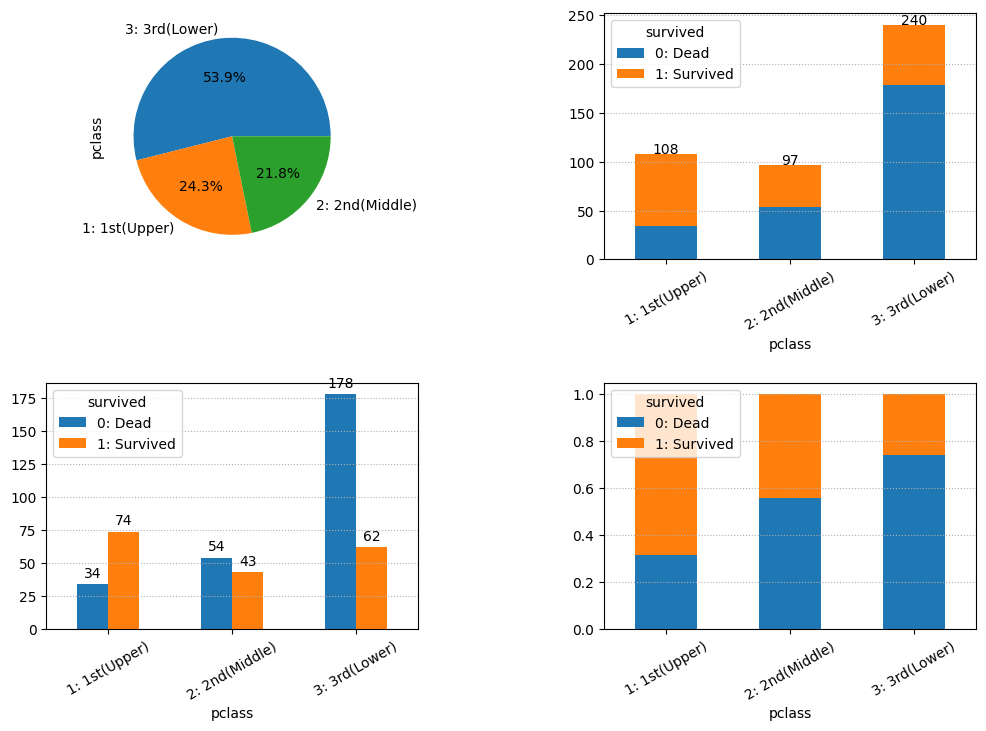

In [31]:
#Pclass(席等級) グラフ出力を行う
DICT_PCLASS = {1: '1: 1st(Upper)', 2: '2: 2nd(Middle)', 3: '3: 3rd(Lower)'}
output_bars(train, 'pclass', DICT_PCLASS)


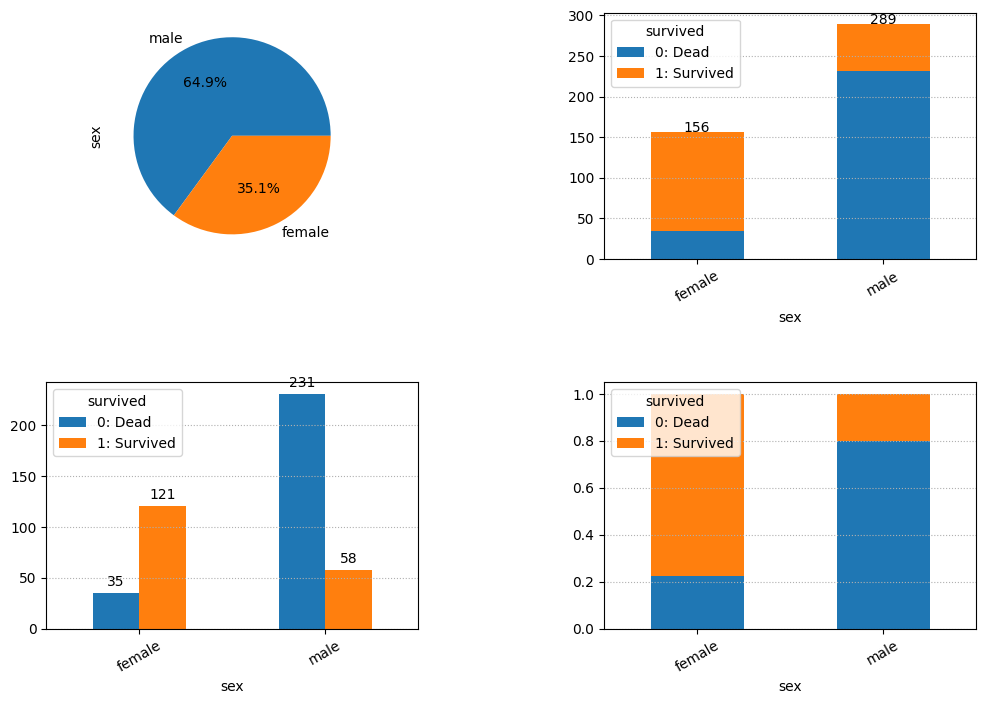

In [32]:
#Sec(性別)　グラフ出力
output_bars(train, 'sex')


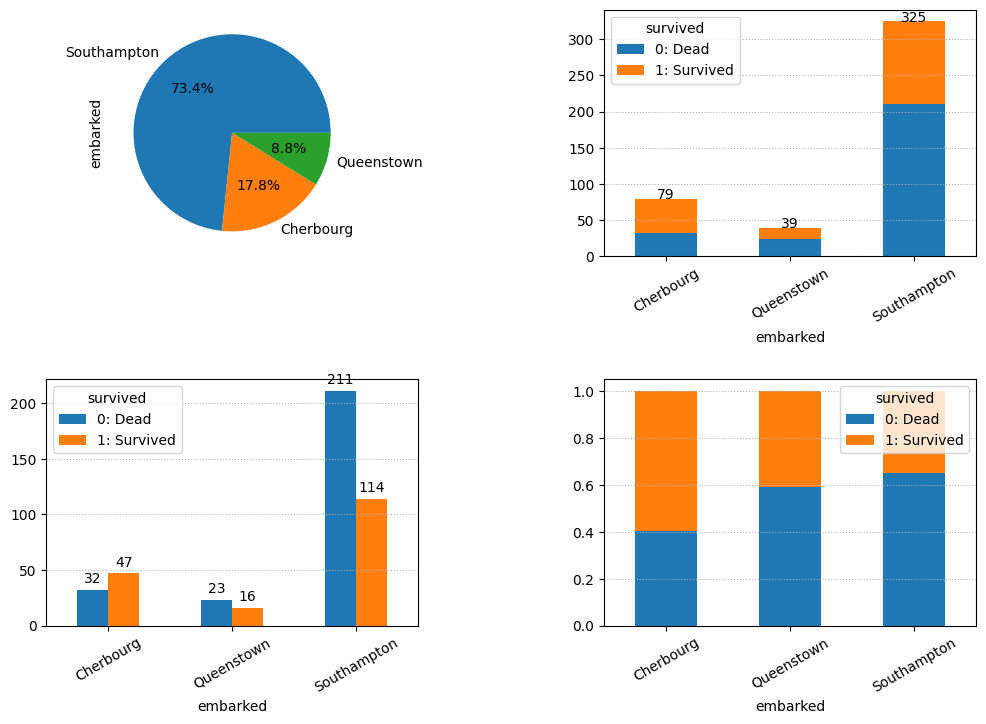

In [33]:
#Embarked(乗船港) グラフ出力
DICT_EMBARK = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
output_bars(train, 'embarked', DICT_EMBARK)


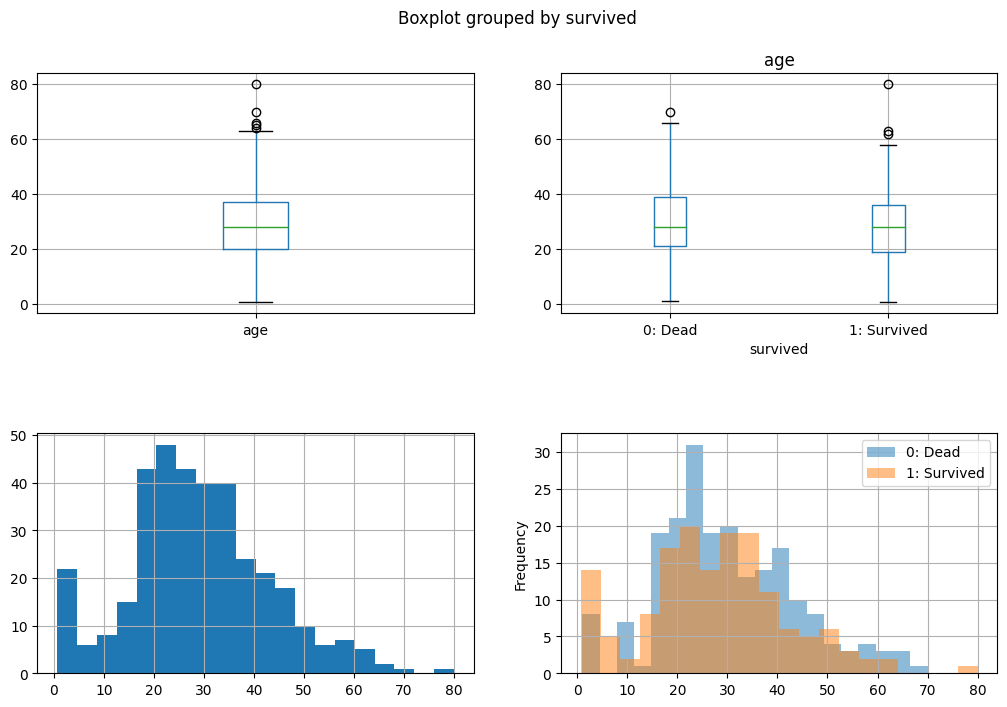

In [34]:
# Age(年齢) グラフ出力
def output_box_hist(column, bins=20, query=None):
    if query == None:
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    else:
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
        train.query(query)[column].hist(ax=axes[2, 0], bins=bins)
        train.query(query).groupby('survived')[column].plot.hist(
        ax=axes[2, 1], bins=bins, alpha=0.5, legend=True, grid=True)
        axes[2, 1].legend(labels=[DICT_SURVIVED[int(float((text.get_text())))] for text in axes[2, 1].get_legend().get_texts()])

    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    train.boxplot(ax=axes[0, 0], column=[column])
    train.boxplot(ax=axes[0, 1], column=[column], by='survived')
    axes[0, 1].set_xticklabels([DICT_SURVIVED[int(float(xticklabel.get_text()))] for xticklabel in axes[0, 1].get_xticklabels()])
    train[column].hist(ax=axes[1, 0], bins=bins)
    train.groupby('survived')[column].plot.hist(ax=axes[1, 1], bins=bins, alpha=0.5, grid=True, legend=True)
    axes[1, 1].legend(labels=[DICT_SURVIVED[int(float((text.get_text())))] for text in axes[1, 1].get_legend().get_texts()])

    plt.show()

output_box_hist('age')


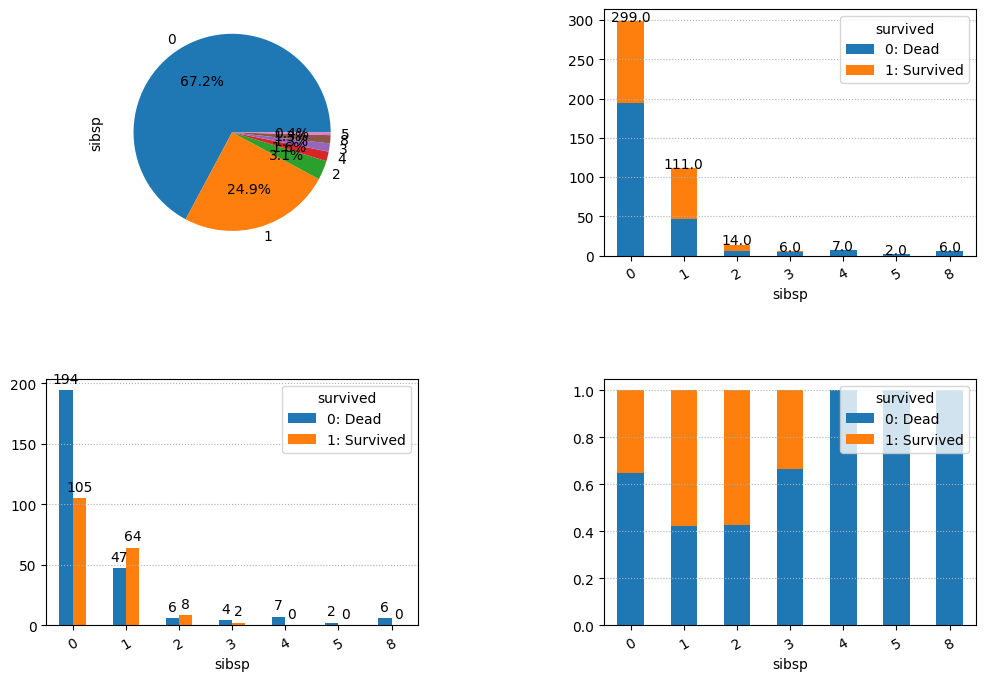

In [35]:
#SibSp(同乗した兄弟姉妹と配偶者数) グラフ出力
output_bars(train, 'sibsp')

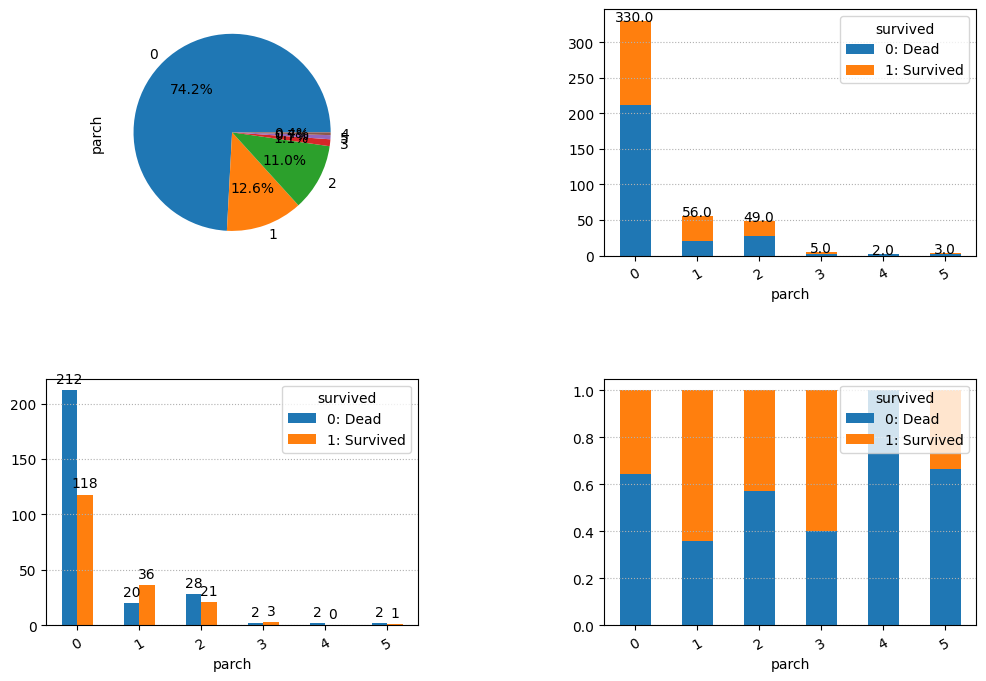

In [36]:
#Parch(同乗した両親子どもの数) グラフ出力
output_bars(train, 'parch')


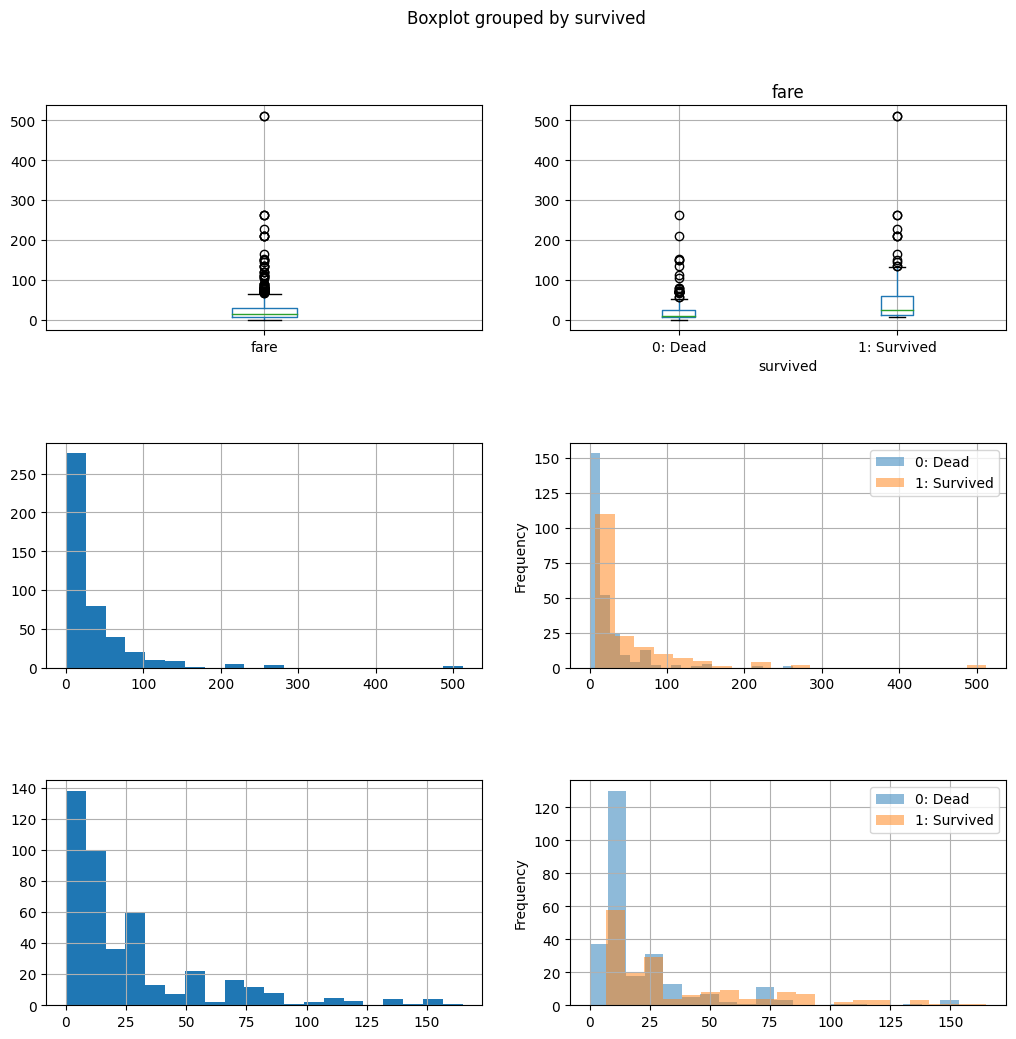

In [37]:
#Fare(料金) グラフ出力
output_box_hist('fare', 20, 'fare < 200')


In [38]:
#相関行列出力
train.loc[:, ["survived", "pclass", "age", "sibsp", "parch", "fare"]].corr().style.background_gradient(axis=None)

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.358097,-0.081394,-0.045087,0.079669,0.258605
pclass,-0.358097,1.000000,-0.300686,0.069857,-0.015726,-0.549651
age,-0.081394,-0.300686,1.000000,-0.283126,-0.153382,0.098488
sibsp,-0.045087,0.069857,-0.283126,1.000000,0.423522,0.164773
parch,0.079669,-0.015726,-0.153382,0.423522,1.000000,0.241855
fare,0.258605,-0.549651,0.098488,0.164773,0.241855,1.000000


In [39]:
#基本統計量の確認
#データフレーム.describe()で確認することができる
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000
mean,0.402247,2.296629,29.211583,0.546067,0.431461,33.959971
std,0.490903,0.834024,14.154300,1.195247,0.850489,52.079492
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,1.000000,3.000000,37.250000,1.000000,1.000000,31.387500
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [40]:
#Nullの数のカウント
#データフレーム.isnull()でNullかどうか判別
#データフレーム.sum()で集計している
train.isnull().sum()

survived     0
pclass       0
sex          0
age         85
sibsp        0
parch        0
fare         0
embarked     2
dtype: int64

In [41]:
test.isnull().sum()

pclass       0
sex          0
age         92
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64

In [42]:
#Nullが一つでもある列を表示している
#データフレーム.isnull()でNullかどうか判別　NullがあるとTrueになる
#データフレーム.any(axis=1)で　axis=1 横方向(列)に一つでもTrueがあると　その列をTrueにする
#データフレーム[データフレームの条件式]　でデータフレームの条件式の結果がTrueになった列を表示できる
train[train.isnull().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
32,1,3,female,NaN,0,0,7.7500,Q
...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S
849,1,1,female,NaN,1,0,89.1042,C
863,0,3,female,NaN,8,2,69.5500,S


In [43]:
#生死の数をカウントしている
#データフレーム['カラム']でカラムを指定
#データフレーム.value_counts()で値の数を数える
train['survived'].value_counts()

0    266
1    179
Name: survived, dtype: int64

ここからが前処理

In [44]:
# 各列の平均値を計算
mean_values_train = train.mean()
mean_values_test = test.mean()

# 欠損値を平均値で補完
train = train.fillna(mean_values_train)
test = test.fillna(mean_values_test)



<ipython-input-44-ff393fb28d73>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values_train = train.mean()
<ipython-input-44-ff393fb28d73>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values_test = test.mean()


In [45]:
# categorical_columnsはOne-hot encodingを行いたい列の名前のリスト
categorical_columns = ['sex', 'embarked']

# 訓練データセットでOne-hot encodingを行う
train = pd.get_dummies(train, columns=categorical_columns)

# テストデータセットでOne-hot encodingを行う
test = pd.get_dummies(test, columns=categorical_columns)

In [46]:
#カラム一覧の表示
#データフレーム.columnsで表示できる
train.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

ここまでが前処理

ここからがモデルの学習、評価


In [47]:
# 分析に使用する特徴量（説明変数）のリスト
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']
# 目的変数（ここでは生存したかどうか）を取得
y = train["survived"].astype('int')
# 特徴量に対応するデータを取得
X = train[features]

# ランダムフォレストモデルのインスタンスを作成します
# n_estimatorsは決定木の数を指定します
rf = RandomForestClassifier(n_estimators=100)




In [48]:
# データを訓練用とテスト用に分割します
# ここでは70:30の割合で分けています
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# ランダムフォレストモデルを訓練データで訓練します
rf.fit(X_train, y_train)

# テストデータの予測を行います
predictions = rf.predict(X_test)

# 予測の正確さ（Accuracy）を評価します
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# AUCスコアを計算し、モデルの性能を評価します
# AUCスコアはクラス分類の閾値に依存しないため、バランスの取れていないデータセットに適しています
auc_score = roc_auc_score(y_test, predictions)
print(f'AUC Score: {auc_score:.2f}')


Accuracy: 0.79
AUC Score: 0.79



ランダムフォレストのハイパーパラメータについて
---



n_estimators: ランダムフォレストで用いる決定木の数。多いほどモデルは堅牢になりますが、計算コストが増加し、ある点を超えると性能の向上は限定的になります。

max_features: 最適な分割を探す際に考慮する特徴量の数。一般的には特徴量の数の平方根（分類）または特徴量の数の対数（回帰）がデフォルトで使用されます。

max_depth: 各決定木の最大の深さ。これを制限することでモデルの過学習を防ぐことができます。

min_samples_split: ノードを分割するために必要なサンプルの最小数。大きい値を設定すると、過学習を抑えるが、小さすぎると分割が過剰に行われる可能性があります。

min_samples_leaf: 葉ノード（決定木の末端）におけるサンプルの最小数。これも過学習を制御するために使用されます。

bootstrap: ブートストラップサンプリング（サンプルをランダムに再抽出する手法）を使用するかどうか。デフォルトではTrueです。

oob_score: アウト・オブ・バック(oob)サンプルを使用してモデルの汎化精度を評価するかどうか。ブートストラップサンプリングで使用されなかったサンプルを用いて評価します。

criterion: 決定木の分割品質を測定する機能。分類の場合、「gini」や「entropy」が一般的です。

max_leaf_nodes: 最大の葉ノード数。モデルの成長を制限する別の方法です。

min_impurity_decrease: 分割がこの値より大きな不純度の減少を引き起こす場合にのみ分割が行われます。

交差検証とハイパーパラメータ調整を入れたもの

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.82
AUC Score: 0.81
Precision: 0.75
Recall: 0.78
F1 Score: 0.77
Confusion Matrix:

              Predicted Positive  Predicted Negative
Actual Positive    TP: 70             FN: 11
Actual Negative    FP: 13             TN: 40

CPU times: user 10.5 s, sys: 55.7 ms, total: 10.5 s
Wall time: 10.6 s


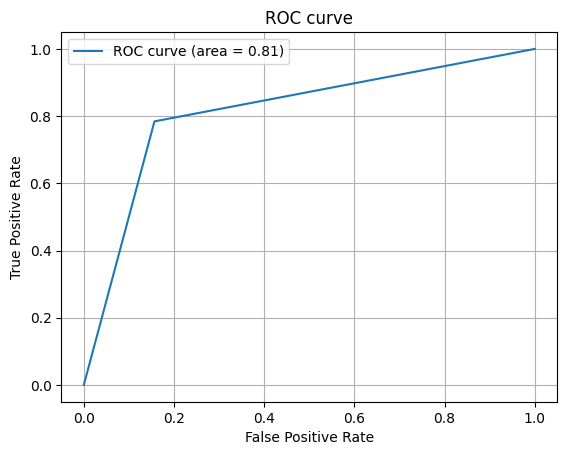

In [52]:
%%time

# モデルの評価を行うために、データを訓練用とテスト用に分割します
# ここで70:30の割合で分けています
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# グリッドサーチで調整したいモデルのパラメータを辞書型で指定します
param_grid = {
    'n_estimators': [100, 200, 300],  # 使用する決定木の数
    'max_depth': [10, 20, 30],   # 決定木の最大深さ
    # 他のパラメータも追加可能です
}

# 交差検証時の分割戦略を設定します
# StratifiedKFoldは、各分割が元のデータセットのクラス比率を保つようにします
cv_strategy = StratifiedKFold(n_splits=5)

# グリッドサーチの設定を行います
# rfは検証したいモデル、param_gridは調整したいパラメータの範囲、
# cvは交差検証の分割戦略、scoringは評価指標を指定します
grid_search = GridSearchCV(rf, param_grid, cv=cv_strategy, scoring='roc_auc')

# グリッドサーチを実行し、最適なパラメータを見つけます
# 全てのデータセットX, yを使用します
grid_search.fit(X_train, y_train)

# 最適なパラメータを出力します
print(f'Best parameters: {grid_search.best_params_}')

# グリッドサーチの結果、最適と判断されたモデルを取得します
best_rf = grid_search.best_estimator_



# 最適化されたモデルを使ってテストデータの予測を行います
predictions = best_rf.predict(X_test)

# 予測の正確さ（Accuracy）を評価します
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# AUCスコアを計算し、モデルの性能を評価します
# AUCスコアはクラス分類の閾値に依存しないため、バランスの取れていないデータセットに適しています
auc_score = roc_auc_score(y_test, predictions)
print(f'AUC Score: {auc_score:.2f}')


#そのほかの指標についても2行ほどで確認できる
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
# 混同行列の要素を取得

TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

#TP (True Positive): 実際にポジティブで、ポジティブと正しく予測されたケース
#TN (True Negative): 実際にネガティブで、ネガティブと正しく予測されたケース
#FP (False Positive): 実際にはネガティブだが、ポジティブと誤って予測されたケース
#FN (False Negative): 実際にはポジティブだが、ネガティブと誤って予測されたケース

# 混同行列の内容をより理解しやすく表示
print(f'Confusion Matrix:\n')
print(f'              Predicted Positive  Predicted Negative')
print(f'Actual Positive    TP: {TP}             FN: {FN}')
print(f'Actual Negative    FP: {FP}             TN: {TN}\n')

# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# ついでにAUCも
auc_score_plt = auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'% auc_score_plt)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)





提出用の予測とファイル出力

In [50]:
# 最適化されたモデル（best_rf）を使って、評価用データ（test）に対する予測を実行
predictions = best_rf.predict(test)

# 予測結果を応募用サンプルファイル（sample_submit）の適切な列に割り当てる
sample_submit[1] = predictions

# 予測結果を含む応募用ファイルをTSV形式で保存
# ヘッダーは不要なので、header=Falseを指定
sample_submit.to_csv("final_submission.tsv", sep="\t", header=False)
